# Examples using `blackmarblepy`

## NASA EarthData Bearer Token

This package requires using a **bearer token**; to obtain a token, follow the below steps:

1. Go to the [NASA LAADS Archive](https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5000/VNP46A3/)
2. Click "Login" (bottom on top right); create an account if needed.
3. Click "See wget Download Command" (bottom near top, in the middle)
4. After clicking, you will see text that can be used to download data. The "Bearer" token will be a long string in red.

__After logging in, the below will show the bearer token in red instead of `INSERT_DOWNLOAD_TOKEN_HERE`.__ Sometimes, after logging in, the NASA website will redirect to another part of the website. To obtain the bearer token, just navigate to the [NASA LAADS Archive](https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5000/VNP46A3/) after logging in.

![title](../docs/images/nasa_laads_login.png)

## Installing **BlackMarblePy**

**BlackMarblePy** is available on [PyPI](https://pypi.org); you can install it using `pip` or directly from the repository: 

In [2]:
# Install via pip
#!pip install blackmarblepy

In [3]:
# Install directlry from repository
#!pip install git+https://worldbank/blackmarblepy.git

## Usage

### Load requirements

In [2]:
import datetime
import glob
import os
import time

import colorcet as cc
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio
import seaborn as sns
from gadm import GADMDownloader

from blackmarble.bm_extract import bm_extract
from blackmarble.bm_raster import bm_raster

### Define NASA bearer token 

For instructions on obtaining a NASA bearer token, please see above.

In [3]:
bearer = os.getenv("BLACKMARBLE_TOKEN")

#### Define Region of Interest

Define region of interest for where we want to download nighttime lights data.

In [4]:
gdf = GADMDownloader(version="4.0").get_shape_data_by_country_name(
    country_name="Ghana", ad_level=1
)

## Make raster of nighttime lights <a name="make_rasters">

The below example shows making daily, monthly, and annual rasters of nighttime lights for Ghana.

In [5]:
### Daily data: raster for February 5, 2021
r_20210205 = bm_raster(
    roi_sf=gdf, product_id="VNP46A2", date="2021-02-05", bearer=bearer
)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/4.41M [00:00<?, ?B/s]

  0%|          | 0.00/3.26M [00:00<?, ?B/s]

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

  0%|          | 0.00/3.15M [00:00<?, ?B/s]

In [6]:
### Monthly data: raster for October 2021
r_202110 = bm_raster(roi_sf=gdf, product_id="VNP46A3", date="2021-10-01", bearer=bearer)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/11.5M [00:00<?, ?B/s]

  0%|          | 0.00/8.64M [00:00<?, ?B/s]

  0%|          | 0.00/10.6M [00:00<?, ?B/s]

  0%|          | 0.00/7.72M [00:00<?, ?B/s]

In [7]:
### Annual data: raster for 2021
r_2021 = bm_raster(roi_sf=gdf, product_id="VNP46A4", date="2021-10-01", bearer=bearer)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/9.37M [00:00<?, ?B/s]

  0%|          | 0.00/14.0M [00:00<?, ?B/s]

  0%|          | 0.00/9.66M [00:00<?, ?B/s]

## Make raster stack of nighttime lights across multiple time periods <a name="make_stacks">

To extract data for multiple time periods, add multiple time periods to date. The function will return a raster stack, where each raster band corresponds to a different date. The below code provides examples getting data across multiple days, months, and years.

In [8]:
#### Raster stack of daily data
date_range = (
    pd.date_range(
        datetime.datetime.strptime("2021-03-01", "%Y-%m-%d"),
        datetime.datetime.strptime("2021-03-03", "%Y-%m-%d"),
        freq="D",
    )
    .strftime("%Y-%m-%d")
    .tolist()
)

r_daily = bm_raster(
    roi_sf=gdf,
    product_id="VNP46A2",
    date=date_range,
    bearer=bearer,
)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/4.89M [00:00<?, ?B/s]

  0%|          | 0.00/2.57M [00:00<?, ?B/s]

  0%|          | 0.00/4.82M [00:00<?, ?B/s]

  0%|          | 0.00/3.16M [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/4.69M [00:00<?, ?B/s]

  0%|          | 0.00/3.56M [00:00<?, ?B/s]

  0%|          | 0.00/5.59M [00:00<?, ?B/s]

  0%|          | 0.00/3.24M [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/6.15M [00:00<?, ?B/s]

  0%|          | 0.00/3.21M [00:00<?, ?B/s]

  0%|          | 0.00/6.68M [00:00<?, ?B/s]

  0%|          | 0.00/3.31M [00:00<?, ?B/s]

In [9]:
#### Raster stack of monthly data
date_range = (
    pd.date_range(
        datetime.datetime.strptime("2021-01-01", "%Y-%m-%d"),
        datetime.datetime.strptime("2021-03-31", "%Y-%m-%d"),
        freq="MS",
    )
    .strftime("%Y-%m-%d")
    .tolist()
)

r_monthly = bm_raster(roi_sf=gdf, product_id="VNP46A3", date=date_range, bearer=bearer)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/7.20M [00:00<?, ?B/s]

  0%|          | 0.00/6.81M [00:00<?, ?B/s]

  0%|          | 0.00/9.24M [00:00<?, ?B/s]

  0%|          | 0.00/7.71M [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/11.7M [00:00<?, ?B/s]

  0%|          | 0.00/7.55M [00:00<?, ?B/s]

  0%|          | 0.00/9.30M [00:00<?, ?B/s]

  0%|          | 0.00/8.13M [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/10.1M [00:00<?, ?B/s]

  0%|          | 0.00/7.61M [00:00<?, ?B/s]

  0%|          | 0.00/11.0M [00:00<?, ?B/s]

  0%|          | 0.00/8.93M [00:00<?, ?B/s]

In [10]:
#### Raster stack of annual data
date_range = (
    pd.date_range(
        datetime.datetime.strptime("2019-01-01", "%Y-%m-%d"),
        datetime.datetime.strptime("2023-01-01", "%Y-%m-%d"),
        freq="Y",
    )
    .strftime("%Y-%m-%d")
    .tolist()
)

r_annual = bm_raster(
    roi_sf=gdf,
    product_id="VNP46A4",
    date=date_range,
    bearer=bearer,
)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/14.5M [00:00<?, ?B/s]

  0%|          | 0.00/8.98M [00:00<?, ?B/s]

  0%|          | 0.00/14.6M [00:00<?, ?B/s]

  0%|          | 0.00/9.66M [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/9.18M [00:00<?, ?B/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/9.68M [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/9.37M [00:00<?, ?B/s]

  0%|          | 0.00/14.0M [00:00<?, ?B/s]

  0%|          | 0.00/9.66M [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/13.2M [00:00<?, ?B/s]

  0%|          | 0.00/9.68M [00:00<?, ?B/s]

  0%|          | 0.00/13.4M [00:00<?, ?B/s]

  0%|          | 0.00/9.55M [00:00<?, ?B/s]

## Mapping nighttime lights

In this section, we illustrate an example of making maps of nighttime lights.

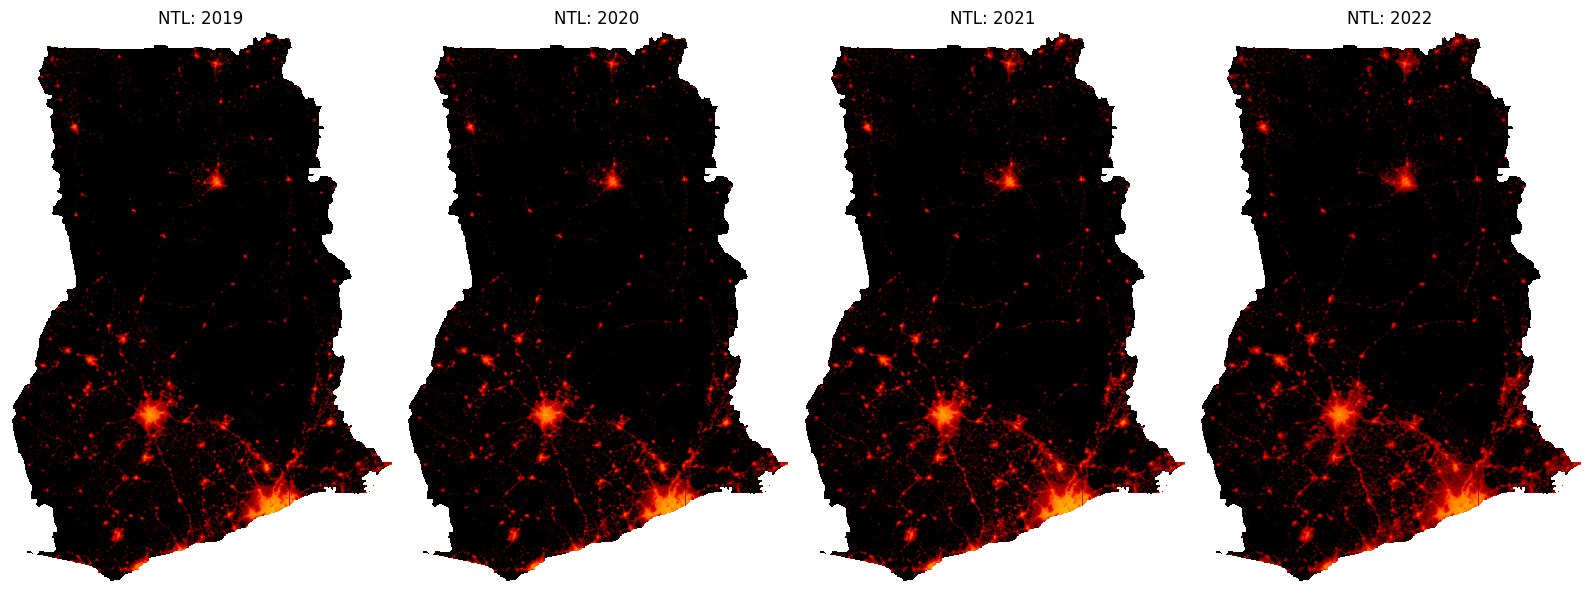

In [11]:
# Set up the figure and subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 8))

# Generate the images and configure each subplot
for i, year in enumerate(date_range):
    r_np = r_annual.read(i + 1)
    r_np = np.log(r_np + 1)

    ax = axs[i]

    # Display the image
    ax.imshow(r_np, cmap=cc.cm.fire)
    ax.axis("off")
    ax.set_title("NTL: {}".format(year[0:4]))

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

## Compute trends on nighttime lights over time

We can use the `bm_extract` function to observe changes in nighttime lights over time. The `bm_extract` function leverages the [rasterstats](https://pythonhosted.org/rasterstats/) package to aggregate nighttime lights data to polygons. Below we show trends in annual nighttime lights data across Ghana's first administrative divisions.

In [12]:
df = bm_extract(
    roi_sf=gdf,
    product_id="VNP46A4",
    date=date_range,
    bearer=bearer,
)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/14.5M [00:00<?, ?B/s]

  0%|          | 0.00/8.98M [00:00<?, ?B/s]

  0%|          | 0.00/14.6M [00:00<?, ?B/s]

  0%|          | 0.00/9.66M [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/9.18M [00:00<?, ?B/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/9.68M [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/9.37M [00:00<?, ?B/s]

  0%|          | 0.00/14.0M [00:00<?, ?B/s]

  0%|          | 0.00/9.66M [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/13.2M [00:00<?, ?B/s]

  0%|          | 0.00/9.68M [00:00<?, ?B/s]

  0%|          | 0.00/13.4M [00:00<?, ?B/s]

  0%|          | 0.00/9.55M [00:00<?, ?B/s]

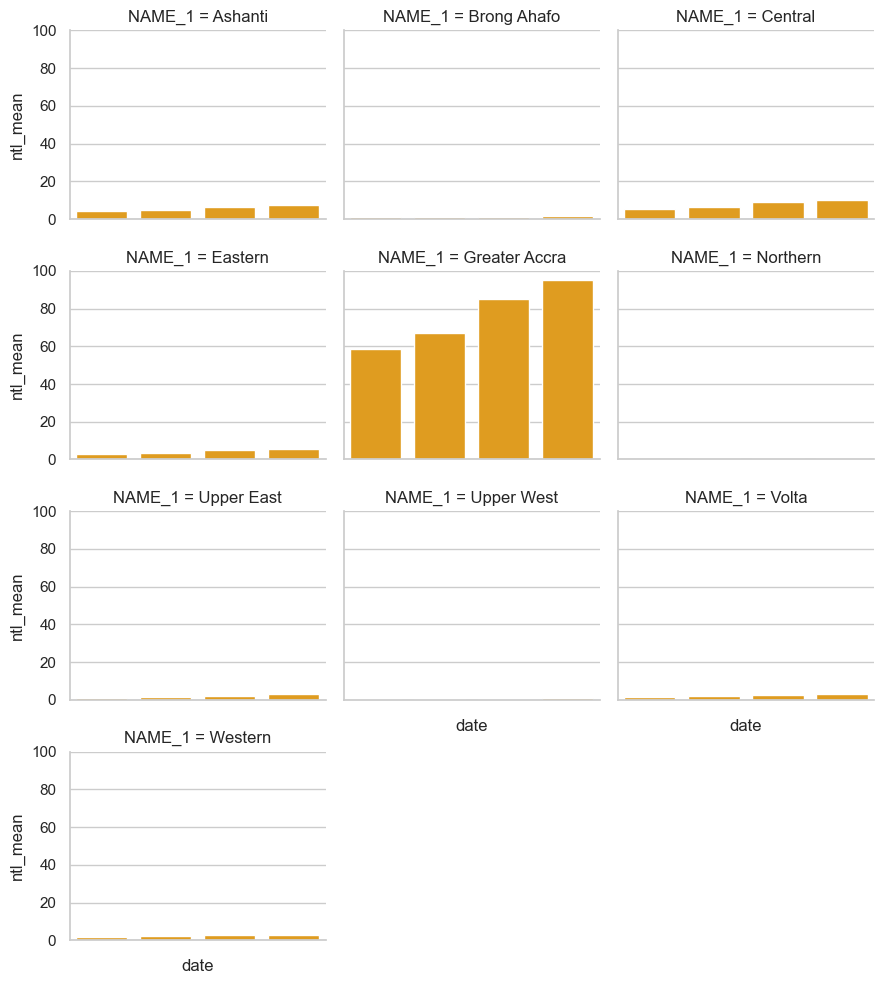

In [13]:
sns.set(style="whitegrid")

g = sns.catplot(
    data=df,
    kind="bar",
    x="date",
    y="ntl_mean",
    col="NAME_1",
    height=2.5,
    col_wrap=3,
    aspect=1.2,
    color="orange",
)

# Set the x-axis rotation for better visibility
g.set_xticklabels(rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()